In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [68]:
# Load the data
credit_card_fraud = pd.read_csv('credit_card_fraud.csv')

In [69]:
# Display basic information on dataset
credit_card_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339607 entries, 0 to 339606
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  339607 non-null  object 
 1   merchant               339607 non-null  object 
 2   category               339607 non-null  object 
 3   amt                    339607 non-null  float64
 4   city                   339607 non-null  object 
 5   state                  339607 non-null  object 
 6   lat                    339607 non-null  float64
 7   long                   339607 non-null  float64
 8   city_pop               339607 non-null  int64  
 9   job                    339607 non-null  object 
 10  dob                    339607 non-null  object 
 11  trans_num              339607 non-null  object 
 12  merch_lat              339607 non-null  float64
 13  merch_long             339607 non-null  float64
 14  is_fraud               339607 non-nu

In [70]:
print(len(credit_card_fraud.columns))

15


`is_fraud` states whether the data is fraudulent or not. The rest of the columns are potential features.

In [71]:
# Call the head method 
credit_card_fraud.head().T

,0,1,2,3,4
trans_date_trans_time,2019-01-01 00:00:44,2019-01-01 00:00:51,2019-01-01 00:07:27,2019-01-01 00:09:03,2019-01-01 00:21:32
merchant,"Heller, Gutmann and Zieme",Lind-Buckridge,Kiehn Inc,Beier-Hyatt,Bruen-Yost
category,grocery_pos,entertainment,grocery_pos,shopping_pos,misc_pos
amt,107.23,220.11,96.29,7.77,6.85
city,Orient,Malad City,Grenada,High Rolls Mountain Park,Freedom
state,WA,ID,CA,NM,WY
lat,48.8878,42.1808,41.6125,32.9396,43.0172
long,-118.2105,-112.262,-122.5258,-105.8189,-111.0292
city_pop,149,4154,589,899,471
job,Special educational needs teacher,Nature conservation officer,Systems analyst,Naval architect,"Education officer, museum"


In [72]:
# Check for missing values:
credit_card_fraud.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

No missing data

In [73]:
# Display summary stats
credit_card_fraud.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,339607.000000,339607.000000,339607.000000,3.396070e+05,339607.000000,339607.000000,339607.000000
mean,70.577984,39.718991,-110.622605,1.071409e+05,39.718853,-110.622383,0.005247
std,161.675242,5.094961,12.651370,2.930299e+05,5.130894,12.663998,0.072248
min,1.000000,20.027100,-165.672300,4.600000e+01,19.027422,-166.671575,0.000000
25%,9.600000,36.715400,-120.093600,4.710000e+02,36.817194,-119.823755,0.000000
50%,46.460000,39.617100,-111.098500,1.645000e+03,39.586209,-111.036443,0.000000
75%,83.350000,41.710000,-100.621500,3.543900e+04,42.193072,-100.353096,0.000000
max,28948.900000,66.693300,-89.628700,2.383912e+06,67.510267,-88.629203,1.000000


In [85]:
# Identify the numerical and categorical columns
numerical_columns = credit_card_fraud.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = credit_card_fraud.select_dtypes(include='object').columns

# Create seperate Dataframes for numerical and categorical variables
numerical_df = credit_card_fraud[numerical_columns]
categorical_df = credit_card_fraud[categorical_columns]

# Display the results:
print("Numerical Variables:")
print(numerical_df.head())

print("\nCategroical Variables:")
print(categorical_df.head())

Numerical Variables:
      amt      lat      long  city_pop  merch_lat  merch_long  is_fraud
0  107.23  48.8878 -118.2105       149  49.159047 -118.186462         0
1  220.11  42.1808 -112.2620      4154  43.150704 -112.154481         0
2   96.29  41.6125 -122.5258       589  41.657520 -122.230347         0
3    7.77  32.9396 -105.8189       899  32.863258 -106.520205         0
4    6.85  43.0172 -111.0292       471  43.753735 -111.454923         0

Categroical Variables:
  trans_date_trans_time                   merchant       category  \
0   2019-01-01 00:00:44  Heller, Gutmann and Zieme    grocery_pos   
1   2019-01-01 00:00:51             Lind-Buckridge  entertainment   
2   2019-01-01 00:07:27                  Kiehn Inc    grocery_pos   
3   2019-01-01 00:09:03                Beier-Hyatt   shopping_pos   
4   2019-01-01 00:21:32                 Bruen-Yost       misc_pos   

                       city state                                job  \
0                    Orient    WA  S

In [88]:
# Descriptive Stats for numerical columns
numerical_stats = numerical_df.describe()

# Descriptive Stats for categorical columns
categorical_stats = categorical_df.describe(include='object')

# Display the results
print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)

print("\nDescriptive Statistics for Categorical Columns:")
print(categorical_stats)

Descriptive Statistics for Numerical Columns:
                 amt            lat           long      city_pop  \
count  339607.000000  339607.000000  339607.000000  3.396070e+05   
mean       70.577984      39.718991    -110.622605  1.071409e+05   
std       161.675242       5.094961      12.651370  2.930299e+05   
min         1.000000      20.027100    -165.672300  4.600000e+01   
25%         9.600000      36.715400    -120.093600  4.710000e+02   
50%        46.460000      39.617100    -111.098500  1.645000e+03   
75%        83.350000      41.710000    -100.621500  3.543900e+04   
max     28948.900000      66.693300     -89.628700  2.383912e+06   

           merch_lat     merch_long       is_fraud  
count  339607.000000  339607.000000  339607.000000  
mean       39.718853    -110.622383       0.005247  
std         5.130894      12.663998       0.072248  
min        19.027422    -166.671575       0.000000  
25%        36.817194    -119.823755       0.000000  
50%        39.586209   

Descriptive Statistics for Numerical Columns:
- Transaction amount (amt) ranges from $1.00 to $28,948.90.
- Latitude (lat and merch_lat) and longitude (long and merch_long) display geographic coordinates.
- is_fraud column indicates a low fraud rate, with mean 0.53%.

Descriptive Statistics for Categorical Columns:

- trans_date_trans_time: 338,504 unique timestamps, most frequent timestamp is '2019-12-09 17:30:34'.
- merchant: 693 unique merchants, most frequent is 'Kilback LLC'.
- category: 14 unique transaction categories, most frequent is 'gas_transport'.
- city: 176 unique cities, most frequent is 'Phoenix'.
- state: 13 unique states, most frequent is 'CA' (California).
- job: 163 unique job titles, most frequent is 'Surveyor, minerals'.
- dob: 187 unique dates of birth, most frequent is '1987-04-23'.
- trans_num: 339,607 unique transaction numbers.

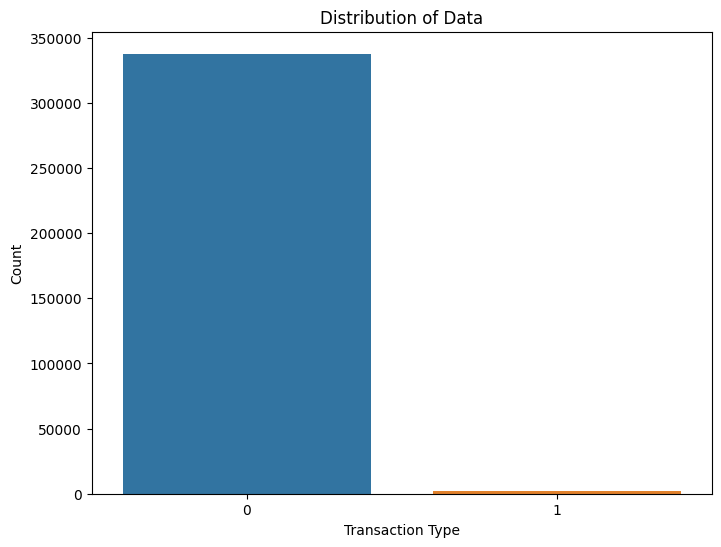

In [74]:
# Visualize the distribution of target variable (is_fraud column - fraud or not)
plt.figure(figsize=(8,6))
sns.countplot(x='is_fraud', data=credit_card_fraud)
plt.title('Distribution of Data')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [83]:
# Fraud to Not fraud ratio:
fraud_count = credit_card_fraud['is_fraud'].value_counts()[1]
non_fraud_count = credit_card_fraud['is_fraud'].value_counts()[0]
fraud_ratio = fraud_count / non_fraud_count

# print results
print("Number of Fraudulent Transactions are:", fraud_count)
print("Number of Valid Tranasctions are:", non_fraud_count)
print("The fraud to valid tranasction ratio is:", fraud_ratio)

Number of Fraudulent Transactions are: 1782
Number of Valid Tranasctions are: 337825
The fraud to valid tranasction ratio is: 0.005274920446976985


<function matplotlib.pyplot.show(close=None, block=None)>

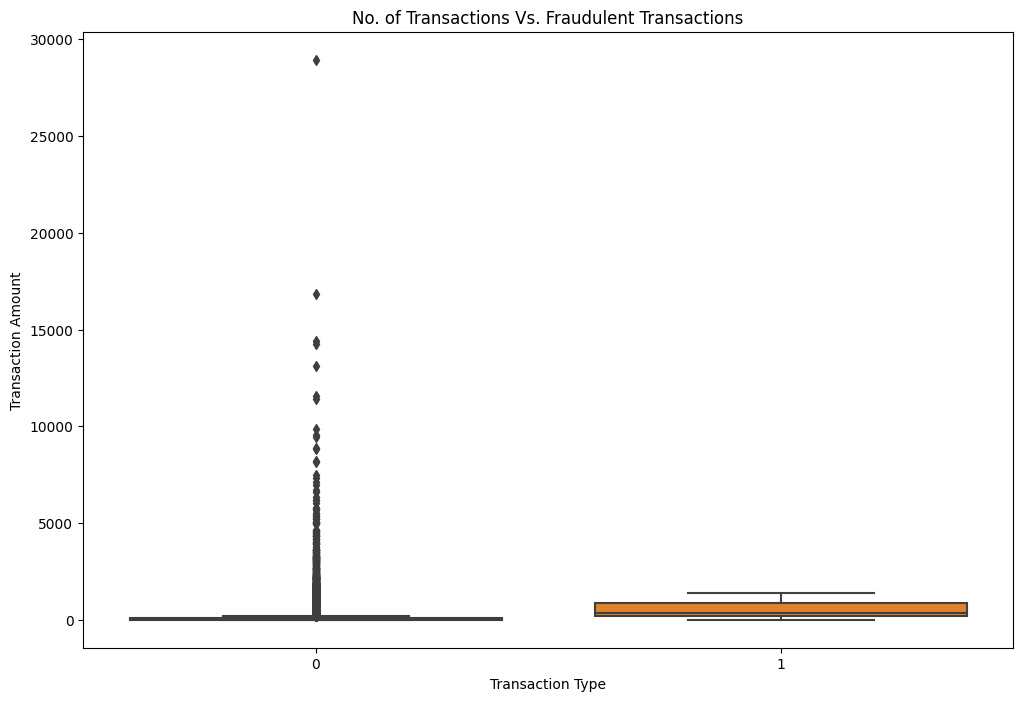

In [75]:
# Expore distribution of transaction amount by fraud status
plt.figure(figsize=(12, 8))
sns.boxplot(x='is_fraud', y='amt', data=credit_card_fraud)
plt.title('No. of Transactions Vs. Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show

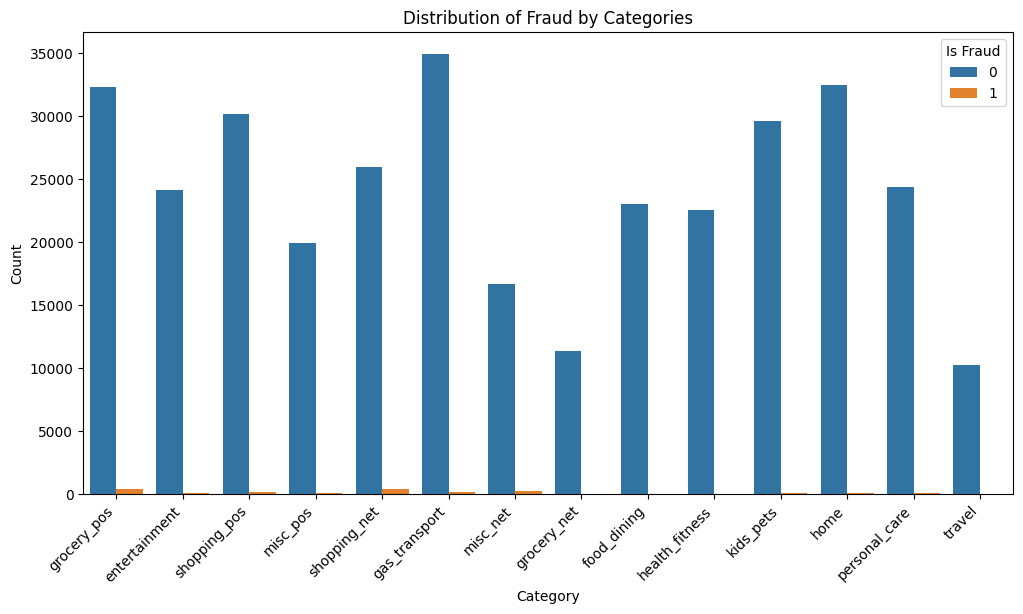

In [76]:
# Explore categorical features (category)
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=credit_card_fraud)
plt.title('Distribution of Fraud by Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

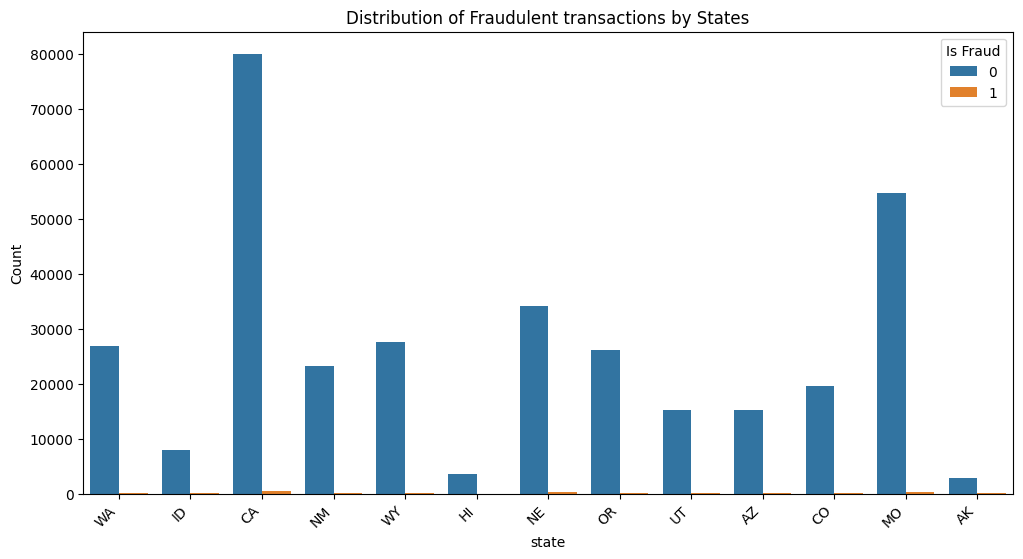

In [77]:
# Explore categorical features (state)
plt.figure(figsize=(12, 6))
sns.countplot(x='state', hue='is_fraud', data=credit_card_fraud)
plt.title('Distribution of Fraudulent transactions by States')
plt.xlabel('state')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Is Fraud')
plt.show()

Next Step:
Prepare the data for model training by encoding categorical variables and scaling numerical features.